In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [203]:
errors = pd.read_csv("errors-0.5-0.5.csv")
errors

,wheel,timestamp,error
0,left,1.588320e+09,-0.769574
1,right,1.588320e+09,-0.782287
2,left,1.588320e+09,-0.757399
3,right,1.588320e+09,-0.770462
4,left,1.588320e+09,-0.745317
...,...,...,...
5701,left,1.588320e+09,0.132905
5702,left,1.588320e+09,0.130852
5703,right,1.588320e+09,0.122140
5704,left,1.588320e+09,0.128841


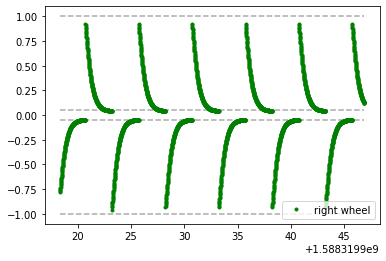

In [204]:
left = errors[errors["wheel"] == "left"]
right = errors[errors["wheel"] == "right"]

plt.hlines(y=[-1, 0.05, -0.05, 1], xmin=min(errors["timestamp"]), xmax=max(errors["timestamp"]), colors="#aaa", linestyles="dashed")
#plt.plot(left["timestamp"], left["error"], 'b.', label="left wheel")
plt.plot(right["timestamp"], right["error"], 'g.', label="right wheel")
plt.legend()
plt.show()

In [205]:
positive = errors[errors["error"] > 0]
min(positive["error"])

0.042337909497999995

In [206]:
negative = errors[errors["error"] < 0]
max(negative["error"])

-0.046004325618400004

In [207]:
states = pd.read_csv("states.csv")
states

,wheel,timestamp,state
0,left,1.588321e+09,0.275459
1,right,1.588321e+09,0.287167
2,left,1.588321e+09,0.279378
3,right,1.588321e+09,0.290992
4,left,1.588321e+09,0.283220
...,...,...,...
38876,right,1.588321e+09,-0.183347
38877,left,1.588321e+09,-0.184197
38878,right,1.588321e+09,-0.171479
38879,left,1.588321e+09,-0.172781


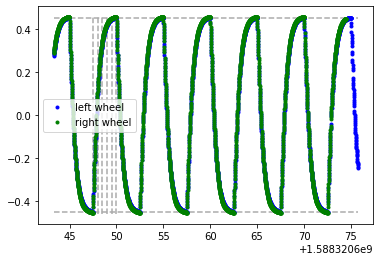

In [222]:
# %matplotlib qt
%matplotlib inline

state_left = states[states["wheel"] == "left"][:3000]
state_right = states[states["wheel"] == "right"][:3000]

plt.hlines(y=[min(state_left["state"]), max(state_left["state"])], xmin=min(state_left["timestamp"]), xmax=max(state_left["timestamp"]), colors="#aaa", linestyles="dashed")
plt.vlines(x=[1588320647.5, 1588320648.0, 1588320648.5, 1588320649, 1588320649.5, 1588320650.0], ymin=-0.46, ymax=0.46, colors="#aaa", linestyles="dashed")
plt.plot(state_left["timestamp"], state_left["state"], 'b.', label="left wheel")
plt.plot(state_right["timestamp"], state_right["state"], 'g.', label="right wheel")
plt.legend()
plt.show()

In [209]:
min(state_left["state"])

-0.45031375727899997

In [210]:
min(state_right["state"])

-0.454081198372

In [211]:
max(state_left["state"])

0.45355379222900005

In [212]:
max(state_right["state"])

0.457587952021

In [213]:
min(state_right["timestamp"])

1588320646.45

# Servo setting time

When switching between -0.5 and 0.5 back and forth, the servo will never reach the exact value. It converges towards -0.45 and 0.45 over the whole period of 2.5 seconds, before the next command is issued.


In [214]:
states_085 = pd.read_csv("states-0.85-0.85.csv")
states_085

,wheel,timestamp,state
0,right,1.588322e+09,-0.553482
1,left,1.588322e+09,-0.590026
2,right,1.588322e+09,-0.558330
3,left,1.588322e+09,-0.594143
4,right,1.588322e+09,-0.563131
...,...,...,...
55000,right,1.588323e+09,0.059803
55001,right,1.588323e+09,0.041774
55002,left,1.588323e+09,0.035904
55003,right,1.588323e+09,0.024103


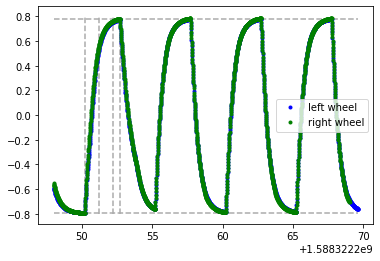

In [215]:
# %matplotlib qt
%matplotlib inline

state_left_085 = states_085[states_085["wheel"] == "left"][0:2000]
state_right_085 = states_085[states_085["wheel"] == "right"][0:2000]

plt.hlines(y=[min(state_left_085["state"]), max(state_left_085["state"])], xmin=min(state_left_085["timestamp"]), xmax=max(state_left_085["timestamp"]), colors="#aaa", linestyles="dashed")
plt.vlines(x=[1588322250.2, 1588322251.2, 1588322252.2,1588322252.7], ymin=-0.8, ymax=0.8, colors="#aaa", linestyles="dashed")
plt.plot(state_left_085["timestamp"], state_left_085["state"], 'b.', label="left wheel")
plt.plot(state_right_085["timestamp"], state_right_085["state"], 'g.', label="right wheel")
plt.legend()
plt.show()

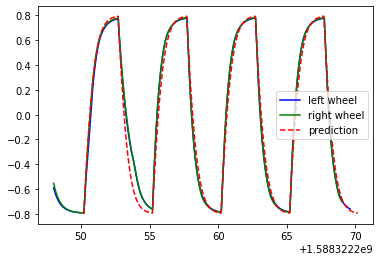

-0.8
-0.45031375727899997
0.7934429960472535
0.45355379222900005


In [216]:
def predict(a, b, dt):
    b -= 0.05 if b > 0 else -0.05
    diff = b - a
    pts = np.array([])
    x = a

    for t in np.arange(0, 2.5, dt):
        pts = np.append(pts, [x])
        r = b - x # remaining
        time_to_adjust = 0.2 * abs(r) + 0.4
        dx = r / time_to_adjust
        x += dx * dt
        
    return pts

dt = 0.01
cycles = 8

pts = np.array([-0.8])
timestamps = np.append(np.array([0]), np.arange(0, 2.5 * cycles, dt))

targets = [0.85, -0.85]
for i in range(cycles):
    target = targets[i % 2]
    pts = np.append(pts, predict(pts[-1], target, dt))

start = min(states_085["timestamp"])
offset = 2.2
plt.plot(state_left_085["timestamp"], state_left_085["state"], 'b-', label="left wheel")
plt.plot(state_right_085["timestamp"], state_right_085["state"], 'g-', label="right wheel")
plt.plot(start + offset + timestamps, pts, 'r--', label="prediction")
plt.legend()
plt.show()

print(min(pts))
print(min(state_left["state"]))

print(max(pts))
print(max(state_left["state"]))

-0.45
-0.45031538542800004
0.4474528214629236
0.453554936385


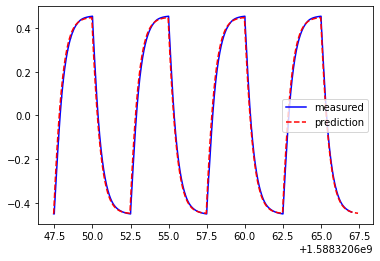

In [239]:
%matplotlib qt

cycles = 8
subset = state_left[380:2200]

dt = (cycles * 2.5) / len(subset)
pts = np.array([-0.45])
timestamps = np.append(np.array([0]), np.arange(0, 2.5 * cycles, dt))

targets = [0.5, -0.5]
for i in range(cycles):
    target = targets[i % 2]
    pts = np.append(pts, predict(pts[-1], target, dt))

start = min(subset["timestamp"])
plt.plot(subset["timestamp"], subset["state"], 'b-', label="measured")
plt.plot(start + timestamps, pts[:len(timestamps)], 'r--', label="prediction")
plt.legend()
plt.show()

print(min(pts))
print(min(state_left["state"]))

print(max(pts))
print(max(state_left["state"]))

